# Anscombe’s quartet dataset

## Background of the datasets

<img style="float: left; margin: 0px 15px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/en/d/d5/Francis_Anscombe.jpeg" alt="Francis Anscombe" title="Francis Anscombe" />Francis Anscombe was a statistician born in England in 1918 and educated at Trinity College, Cambridge University. Anscombe published a paper in 1973 using four data sets with similar summary statistics, but very different looking data-plots, illustrating the importance of graphing data for visual comparison, disputing the idea that graphs are rough but numerical calculations are exact.

The idea disputed was that statistical descriptions alone can summarise and even reproduce a data set without the need of the entire data set representing itself like when shown in a graphical form or in other words that a data set can be recreated from the summary statistics alone.

It is not known how Anscombe came up with his data sets. It was probably a very time consuming exercise generating four data sets with similar statistical summaries. One can only imagine starting our with the first set and generating the summary statistics and then working back from the statistics generating calculated data-points to produce similar statistics four all four sets. Given the time when the data sets were generated, I cannot imagine that it was accomplished very quickly. Having to produce this with today's tools and technologies and automated computer calculations it is still a challenge to do this without prior knowledge of how such sets can be generated. I would probably generate them in the order that they are listed, starting with a scatter plot and generating the trend-line, then proceed to the curved plot moving around points to get the best possible matches and then adding the two straight lines with the big outliers. 

In hindsight, it might actually be much simpler to produce that initially anticipated looking at the sets separately, the mean averages of x and of y is the same, so simply working with all the x values of each set working towards the same mean should be theoretically feasible and then repeat the same for the y values bearing in mind that for the fist set we need a random looking scattered pattern, a curve for the second big outliers on the straight lines for the last two. 

Having arrogantly pursued this on paper to try and prove the point, I have quickly come to realise that this is no trivial feat. Lining up the one axis and finding the statistics to make it work quickly throws out the next statistic trying to line up the next set. A lot of though and work went into the generation of this data set.

The article reference by Robert Kosara has interesting insights in it's closing paragraphs from his paper published in 2011 where Anscombe describes his preference for APL (an ancient programming language), but assures the reader who can program in FORTRAN or PL/1 that he will be able to produce graphs. 

This provides some insight into the tools at Anscombe's disposal to perform the calculations to come up with the data sets and he probably used his preferred programming tools to generate the now famous quartet.

<img style="float: left; margin: 10px 15px 0px 0px;" width="450" src="http://archive.vector.org.uk/content/printed/251/saigusa/image009.jpg"/>APL was names after a book published on the topic named _A Programming Language_. The central data type is multi-dimensional arrays with a large range of special graphic symbols representing functions and operators with the ability to create very concise code. 

Looking at modern day approached creating similar datasets on sources like __[datasauRus](https://github.com/lockedata/datasauRus)__. Studying this method and looking at the approached employed, the key insight behind their approach is that while it is relatively difficult to generate a completely new dataset from scratch, with particular statistical properties, it is relatively easy to take an existing dataset, modify it slightly, and maintain those statistical properties. They do this by choosing a point at random, moving it a little bit, then checking that the statistical properties of the set haven't strayed outside of the acceptable bounds, i.e., ensuring that the means, standard deviations, and correlations remain the same to two decimal places.So in essence, start with a random plot and take it through around 200k iteration of subtle movements to create distinct new patterns.

So given that Anscombe had access to automated multi-dimensional array mathematical tools, and given the approached taken by the datasauRus team, this is probably the approach taken by Anscombe too.


### Disecting the dataset

Some deeper digging into the datasets and extracting and aligning the x values by set shows a common starting point for three of the four x sets, so an x-axis series of [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # imported to suppress future deprecated warnings
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

anscombe = sns.load_dataset("anscombe")

In [2]:
x=[]
for r in range(0,34,11): x.append([anscombe.loc[i,'x'] for i in range(r,r+11)])
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10
0,10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0
1,10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0
2,10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0
3,8.0,8.0,8.0,8.0,8.0,8.0,8.0,19.0,8.0,8.0,8.0


The X axis values all add up to __99__ and the Y axis values all add up to __82.5__

In [3]:
y=[]
for r in range(0,34,11): y.append([anscombe.loc[i,'y'] for i in range(r,r+11)])
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9,10
0,8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68
1,9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74
2,7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73
3,6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89


In spite of all the insights gained in exploring the options, it was still impossible to reproduce without spending countless hours trying to do so, I've personally wasted half a day trying to do so.

## Plotting the datasets

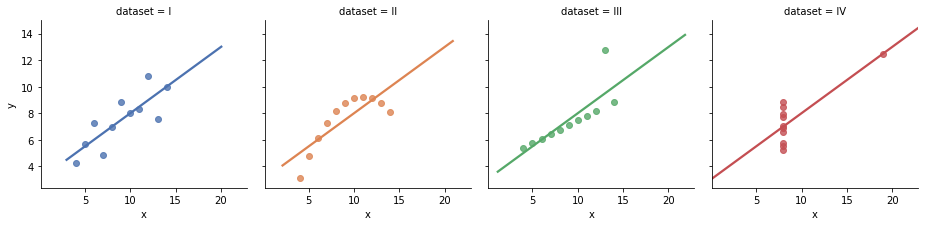

In [10]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe, 
           col_wrap=4, height=3.25, ci=None, palette="deep")# size substitued with height to remove warnings

Viewing the four sets like this surely makes a very strong statement and it is really hard to believe that the descriptive statistics can line up so perfectly and it really makes one wonder how much time and trouble went into the generation of the sets. 

The complexity of this set is not really that obvious from fist glance.

## Descriptive Statistics

In [5]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

The descriptive statistics confirms the claims made by the set that they should be similar. Working with powerful tools and libraries at our disposal with such small amounts of code and effort really makes one stop and think about the power at our disposal with modern day computers and number processing tools and systems. It is mind-blowing that plots and analytics can be generated with so little code today and I personally appreciate not having to master APL to do this.

## What makes the data set interesting?

I was told by a statistician that big data sets do not really require all the data points in the set and that descriptive statistics can basically generate enough information to reproduce an entire set and therefore can be seen like data compression in a sense. In fairness, the Anscombe set is just a small set, so it is still probably a valid statement, however, indisputable that graphing data is an important step at visualising and otherwise understand the data presented before we make any assumptions. Starting out with the descriptive statistics alone, makes a strong case for the graphical visualisation of data once you see the plots in relation to the results.

The other aspect of interest for me lies in generating such a set and especially in a time in history where access to computer or computer based statistical methods was cumbersome and limited for the general users and the programming languages hard to master. I can only image countless hours spent to tweak and recalculate the points of data sets over and over to get the descriptive statistics to match in the way it does. 

The interesting aspect of the last two sets is that the single outliers exerts so much influence on the dataset where the regression line at similar angles runs through them in the same way as the two previous sets.


- The complexity of generating these sets are undervalued and easily missed
- There is always something to learn by investigating further
- Understanding the fundamentals from first principles provides the tools for future exploration

## References

1. __[Arguing for Graphics in 1973](https://eagereyes.org/criticism/anscombes-quartet)__
1. __[Anscombe's Paper](https://www.jstor.org/stable/2682899)__
1. __[Seaborn Examples](https://seaborn.pydata.org/example)__
1. __[The significance of Anscombes Quartet](https://www.quora.com/What-is-the-significance-of-Anscombes-quartet)__
1. __[Phylogenetic Tools for Comparative Biology ](http://blog.phytools.org/2017/10/phylogenetic-anscombe-datasets.html)__
1. __[Anscombe’s Quartet](https://altair-viz.github.io/gallery/anscombe_plot.html)__
1. __[Using and Abusing Data Visualization: Anscombe’s Quartet and Cheating Bonferroni](https://www.r-bloggers.com/using-and-abusing-data-visualization-anscombes-quartet-and-cheating-bonferroni/)__
1. __[What is the significance of Anscombe's quartet?](https://www.quora.com/What-is-the-significance-of-Anscombes-quartet)__
1. __[Generalized Linear Models](http://data.princeton.edu/wws509/stata/anscombe.html)__
1. __[Anscombe’s quartet](https://seaborn.pydata.org/examples/anscombes_quartet.html)__
1. __[The Importance of Data Visualiztion](https://rstudio-pubs-static.s3.amazonaws.com/350044_cba17bbef9fc430d927a6ad99179ae2e.html)__
1. __[Robert Kosara / February 13, 2011 - Anscombe’s Quartet](https://eagereyes.org/criticism/anscombes-quartet)__
1. __[Markdown Reference #1](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)__
1. __[Markdown Reference #2](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)__
1. __[Jupyter SpellChecker](https://stackoverflow.com/questions/39324039/highlight-typos-in-the-jupyter-notebook-markdown)__
1. __[APL Language - Wikipedia](https://en.wikipedia.org/wiki/APL_(programming_language))__
1. __[APL - Programming with Symbols](https://www.whoishostingthis.com/resources/apl/)__
1. __[datasauRus - Anscombe reproduced](https://github.com/lockedata/datasauRus)__